## Assignment 1

##### Descriptive statistics and linear regression


We will first look at the psychophysics dataset. 

Typically, working memory is studied by asking subjects to remember a stimulus for a specific period (eg. for 1s or 3s) that was previously briefly shown. This dataset consists of two experiments conducted in a behavioural study of working memory precision.  Here, we are going to analyse only the data coming from Experiment 2. In this study, there was a total of 9 subjects. Each subject was shown a set of 3 colorful dots on each trial. After stimulus removal, subject had to fixate on black square in the center of the monitor for 3 seconds. After this delay period (3 seconds), the fixation square changed color to a color of one of the previously shown stimuli. At this point, the subject had to report the precise position of that stimuli. In each trial, one stimulus was the target and the other two the non-targets. For the purpose of the article, the stimuli had a certain spatial configuration. In particular one of the two non-targets was very close to the target, either located clockwise or counter-clockwise from the target. The point of the study was to test the hypothesis that behavioral reports to target stimuli of participants would be attractively biased by non-target memory items. The purpose of this exercise is to test this hypothesis with the tools of statistical inference.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import phase, exp 

def circdist_rad(angles1,angles2): #define the name and set the arguments between parentheses
    output = np.array( list (map(lambda a1,a2: phase(exp(1j*a1)/exp(1j*a2)), angles1,angles2)) ) ## mathematical operation to get the circular distance
    return output #return the circular distance in radians 

The angle on the circle of both behavioral response and stimulus locations is given in radian angles in the 4 columns of all_subjs{n}. The 1st column corresponds to behavioral report, the 2nd column to the target stimulus, and the 3rd and 4th columns to non-target stimuli, for each corresponding trial (in rows of all_subjs{n}). In fact, the 3rd column corresponds to the non-target stimulus closest to the target stimulus, so that is the one that we are hypothesizing that will have an influence on participants’ response. Load the data and make a unique matrix with the data of all the subjects.


In [2]:
data = np.loadtxt("C:\\Users\\bnola\\Documents\\Data Analysis\\all_subjects.csv") #use the function loadtxt from numpy to load the contents of the file
##
## indexes 
# 0 responses = angle of response
# 1 targets = angle of response
# 2 near = angle of response (non-target = NT)
# 3 far = angle of response
# 4 subject

In [3]:
np.shape(data)

(857, 5)

You will need to add 3 extra columns:

1. error column (T - R)
2. distance closest distractor (T -NT)
3. cw-ccw trial



Hints:
np.column_stack, 
circdist_rad

In [4]:
behavioral_errors=circdist_rad(data[:,1], data[:,0]) #getting errors for target and response
target_nearest= circdist_rad(data[:,2], data[:,1]) #getting nearest target based on target and near column
cw_trials=(target_nearest<0)*1 #convert True and False to 1 and 0
data = np.column_stack((data, behavioral_errors, target_nearest, cw_trials))

In [5]:
### indexes 
# 0 responses = angle of response
# 1 targets = angle of response
# 2 near = angle of response (non-target = NT)
# 3 far = angle of response
# 4 subject
# 5 error column
# 6 distance closest distractor (target_nearest)
# 7 cw-ccw trial

### Visualization
Plot the visual input in one specific trial by plotting the three cues as red squares and the behavioral response as a blue circle. As a reference, include the fixation dot as a black square. To be specific, let’s take trial 4 of the 3rd subject. Remember that given an angle α in radians, the x and y coordinates on the circle are given by cos(α) and sin(α), respectively.


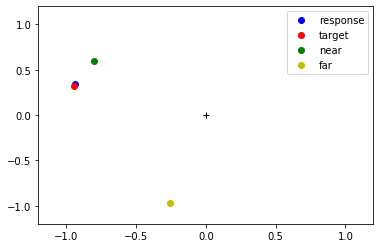

In [6]:
#### Visualize a trial
### subject 3, trial 4
bool_s3 = data[:,4]==2 # 3rd subject
ds=data[bool_s3]
ex_trial=3 # 4th trial

plt.plot(0, 0, 'k+')
plt.plot( np.cos(ds[3,0]), np.sin(ds[3,0]), 'bo', label='response')
plt.plot( np.cos(ds[ex_trial,1]), np.sin(ds[ex_trial,1]), 'ro', label='target')
plt.plot( np.cos(ds[ex_trial,2]), np.sin(ds[ex_trial,2]), 'go', label='near')
plt.plot( np.cos(ds[ex_trial,3]), np.sin(ds[ex_trial,3]), 'yo', label='far')
plt.legend(loc=1)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.show()



### Characterizing data: descriptive statistics

Using measures of centrality and/or dispersion, design a method to confirm that the second column is the target stimulus, and the 3rd and 4th columns are non-target stimuli. Work with other students, there are several possible solutions. Write your code in the next cell, then use the "Insert" option in the upper menu and select "Insert Cell Below" to add one more cell in this notebook in order to enter you interpretation of the results. Make sure you mark this cell as "Markdown" in the menu above before you "ctrl+ENTER" it.

In [7]:
for clm in range(4): print(np.var(circdist_rad(data[:,clm], data[:,0])))

8.247182743102598e-35
0.022610614795975762
0.09429849566642695
5.680122969020586


An even better approach is to use visualization tools. Use the knowledge you have about the stimulus configuration and the *plt.hist* function to confirm that 1st column is the target. 

---


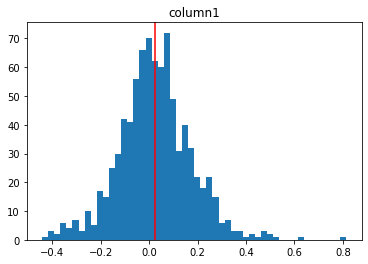

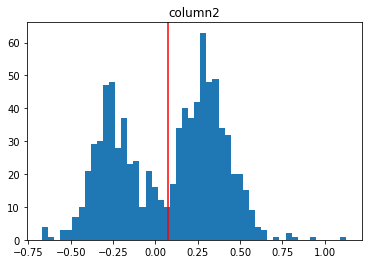

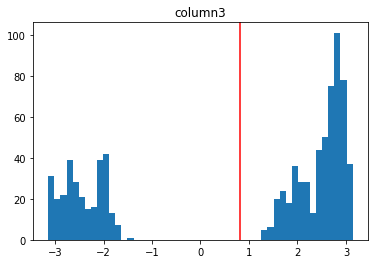

Column 1 is the target


In [8]:
hist1=circdist_rad(data[:,1] , data[:,0] )
mean_hist1=np.mean(hist1)

plt.figure()
plt.title('column1')
plt.hist(hist1, bins=50)
plt.axvline(mean_hist1, color='r')
plt.show()


hist2=circdist_rad(data[:,2], data[:,0])
mean_hist2=np.mean(hist2)

plt.figure()
plt.title('column2')
plt.hist(hist2, bins=50)
plt.axvline(mean_hist2, color='r')
plt.show()

hist3=circdist_rad(data[:,3], data[:,0])
mean_hist3=np.mean(hist3)

plt.figure()
plt.title('column3')
plt.hist(hist3, bins=50)
plt.axvline(mean_hist3, color='r')
plt.show()



print('Column 1 is the target')

### Statistical hypothesis testing: parametric methods

We want to test if there is any effect at the population level of the nearest non-target (NT) item (column 3) on the bias of the behavioral response. The simplest way to test this is by using a t-test to compare the behavioral errors (response (R) - target (T)) for trials in which the NT was clockwise to the T stimulus (CW trials, NT-T<0) with the behavioral errors for trials in which the NT was counterclockwise to the T stimulus (CCW trials, NT-T>0), lumping together data from all subjects. In order to do this, let's first separate in different histograms whether the nearest non-target item (3rd column) was clockwise or counter-clockwise from the target (2nd column). 

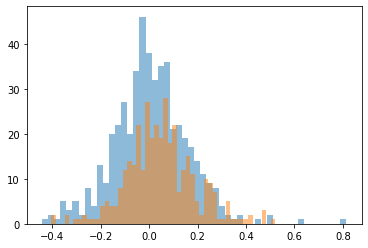

In [9]:
plt.figure(1)
bool_cw = data[:,7]==0
plt.hist(data[bool_cw,5], alpha=0.5, bins=50)

bool_ccw = data[:,7]==1
plt.hist(data[bool_ccw,5], alpha=0.5, bins=50)
plt.show()

Now, do the same thing for each subject. 

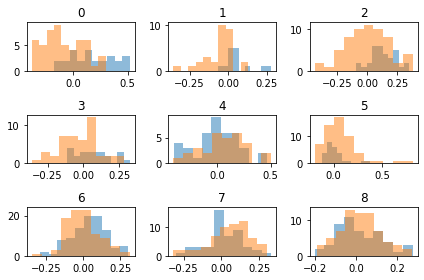

In [10]:
plt.figure()
for subject in range(9):
    plt.subplot(3,3,subject+1)
    bool_s =  data[:,4]==subject #boolean marking trials for subject *subject*
    ds=data[bool_s]
    bool_cw = ds[:,7]==1 #boolean marking cw trials for subject *subject*
    plt.hist(ds[bool_cw,5], alpha=0.5)
    bool_ccw = ds[:,7]==0 #boolean marking ccw trials for subject *subject*
    plt.hist(ds[bool_ccw,5], alpha=0.5)
    plt.title(str(subject))
#
plt.tight_layout()
plt.show()

Test if there is a difference between cw and ccw at both population and subject level. We will use the t-test as implemented in the scipy library (you can Google *ttest_ind*)

Is there an attractive or repulsive effect? How do you know?

In [11]:
from scipy.stats import ttest_ind

print('')
print('')

bool_cw = data[:, 7]==1
bool_ccw = data[:, 7]==0
t, p_val =ttest_ind(data[bool_cw,5],data[bool_ccw,5])
if p_val <0.05:
    if t>0:
        print('Population has a sig. attractive effect')
    if t<0:
        print('Population has a sig. repulsive effect')

print('\n','t = ' +str(t),'\n','p = ' +str(p_val))
print('')

for subject in range(9):
    bool_s = data[:,4]==subject
    ds=data[bool_s]
    bool_cw = ds[:,7]==1
    bool_ccw = ds[:,7]==0
    t, p_val =ttest_ind(ds[bool_cw,5], ds[bool_ccw,5])
    print('')
    if p_val <0.05:
        if t>0:
            print('Subject ' +str(subject) + ' has a sig. attractive effect','\n','t = ' +str(t),'\n', 'p = ' +str(p_val))
        if t<0:
            print('Subject ' +str(subject) + ' has a sig. repulsive effect')
print('')



Population has a sig. attractive effect

 t = 3.8429952155198346 
 p = 0.00013054065806483413


Subject 0 has a sig. attractive effect 
 t = 5.8044267681355075 
 p = 1.3655649256224256e-07

Subject 1 has a sig. attractive effect 
 t = 4.023068584921271 
 p = 0.00022828766643899086

Subject 2 has a sig. attractive effect 
 t = 3.623447317129997 
 p = 0.00047839726546049124

Subject 3 has a sig. attractive effect 
 t = 2.875367720578732 
 p = 0.005427342231541321



Subject 6 has a sig. attractive effect 
 t = 2.080382132375966 
 p = 0.03883189052764111





### Statistical hypothesis testing: non-parametric resampling methods

We can instead avoid the Gaussian hypothesis by using permutation tests. Here, for each subject you would establish how many trials you had in the CW and CCW classes, and randomly assign individual trial errors to one of the two classes by keeping the total number in each class fixed. This resampled distribution of trials in two classes then represents one valid representative sample consistent with your null hypothesis (which is your null hypothesis, by the way?). You compute the distance between medians in your resampled classes, and save that statistic. Then you resample again and repeat the process 1,000 times. Finally you compare the actual statistic from your real CW-CCW class separation to the distribution of statistics in samples that are consistent with your null hypothesis and from there derive a p-value for the probability of your null hypothesis being true. 


First, write in the next cell, using a "Markdown" cell, your null hypothesis in **boldface**

**Null Hypothesis: No difference will be observed between CW-CCW** 

Now use the permutation test for the 5th subject.
Do you get similar results with the ttest?

In [12]:
#first we select the data for the 5th subject, subject 4
bool_s = data[:,4]==4
ds=data[bool_s]

#we form booleans for CW and CCW trials
bool_cw =  ds[:,7]==1
bool_ccw = ds[:,7]==0

#we define our statistic of interest as the difference in medians of the two lists of errors, for CW and CCW trials.
statistic=np.median(ds[bool_cw,5])-np.median(ds[bool_ccw,5]) 

#how many trials do we have of each kind?
nCW =  sum(bool_cw)
nCCW =  sum(bool_ccw)
nt=nCW+nCCW

#we now generate the resampled data for the permutation test
n_perm=10000
stat_perm=[]
for _ in range(n_perm): #we now run our permutations
    indexes=np.random.permutation(nt) #we permute the nt indexes randomly
    inCW=indexes[:nCW] #we take the first nCW indexes as belonging to the permuted "CW" set 
    inCCW=indexes[nCW:] #we take the last nCCW indexes as belonging to the permuted "CCW" set 
    stat_perm.append(np.median(ds[inCW,5])- np.median(ds[inCCW,5]) ) #we compute the statistic from our permuted classes, and save it in the vector stat_perm

stat_perm=np.array(stat_perm)

#here is the p-value of our permutation test. The number of times that our statistic exceeded the statistic of the 
#shuffles divided by the number of shuffles. We take this as the probability that we had obtained a statistic at
#least as extreme as our true data if our null hypothesis was true.
p_value=np.mean( abs(stat_perm)> abs(statistic)) 
print('Subject 5, p_value permutat_test: ' +str(p_value))

#t-test
t, p_val =ttest_ind(ds[bool_cw,5], ds[bool_ccw,5])
print('Subject 5, p_value t-test: ' +str(p_val))

Subject 5, p_value permutat_test: 0.2816
Subject 5, p_value t-test: 0.23649529862047675


Now to understand the result of the permutation test, plot a histogram of your resampled statistics in *stat_perm* and mark the statistic that you obtain in your true data on the x-axis. 

In [13]:
print(statistic)

-0.055105587193656574


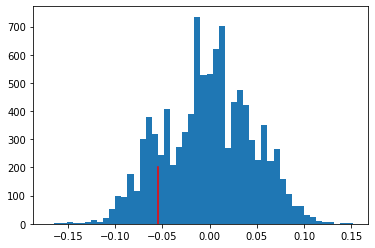

In [14]:
plt.figure()
plt.hist( stat_perm , bins=50)
plt.plot([ statistic, statistic], [0,200], 'r')

Now interpret what the p-value means. Write your answer as a Markdown cell below (Insert it with "Insert"> "Insert Cell Below" in the top menu) 

To test if your interpretation is correct, now run again the permutation test for the first subject and see if it all makes sense

In [15]:
bool_s = data[:,4]==6
ds=data[bool_s]

bool_cw =  ds[:,7]==1
bool_ccw = ds[:,7]==0

statistic=np.median(ds[bool_cw,5])-np.median(ds[bool_ccw,5]) 

nCW =  sum(bool_cw)
nCCW =  sum(bool_ccw)
nt=nCW+nCCW

n_perm=10000
stat_perm=[]
for _ in range(n_perm): #we now run our permutations
    indexes=np.random.permutation(nt) #we permute the nt indexes randomly
    inCW=indexes[:nCW] #we take the first nCW indexes as belonging to the permuted "CW" set 
    inCCW=indexes[nCW:] #we take the last nCCW indexes as belonging to the permuted "CCW" set 
    stat_perm.append(np.median(ds[inCW,5])- np.median(ds[inCCW,5]) ) #we compute the statistic from our permuted classes, and save it in the vector stat_perm

stat_perm=np.array(stat_perm)

p_value=np.mean( abs(stat_perm)> abs(statistic)) 
print('Subject 0, p_value permutat_test: ' +str(p_value))

t, p_val =ttest_ind(ds[bool_cw,5], ds[bool_ccw,5])
print('Subject 0, p_value t-test: ' +str(p_val))

Subject 0, p_value permutat_test: 0.0041
Subject 0, p_value t-test: 0.03883189052764111


Now do this together for all subjects in a for loop: compute permutation test, t-test, and plot histograms for all subjects iterating what we did before for one single subject

Subject 0 p_value permutat_test: 0.0, p_value t-test: 1.3655649256224256e-07
Subject 1 p_value permutat_test: 0.001, p_value t-test: 0.00022828766643899086
Subject 2 p_value permutat_test: 0.004, p_value t-test: 0.00047839726546049124
Subject 3 p_value permutat_test: 0.024, p_value t-test: 0.005427342231541321
Subject 4 p_value permutat_test: 0.303, p_value t-test: 0.23649529862047675
Subject 5 p_value permutat_test: 0.119, p_value t-test: 0.12427312231154128
Subject 6 p_value permutat_test: 0.001, p_value t-test: 0.03883189052764111
Subject 7 p_value permutat_test: 0.071, p_value t-test: 0.18815597714173116
Subject 8 p_value permutat_test: 0.51, p_value t-test: 0.830748277772429


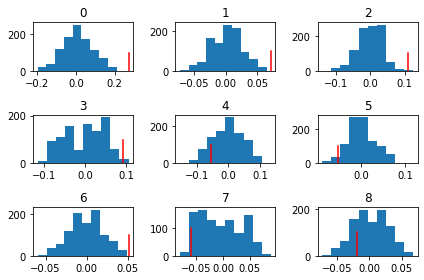

In [16]:
plt.figure()
for subj in range(9):
    #first we select the data for subject subj
    bool_s = data[:,4]==subj
    ds=data[bool_s]
    
    #we form booleans for CW and CCW trials
    bool_cw = ds[:,7]==1
    bool_ccw = ds[:,7]==0 

    #we define our statistic of interest as the difference in medians of the two lists of errors, for CW and CCW trials.
    statistic=np.median(ds[bool_cw,5])-np.median(ds[bool_ccw,5])  
    
    #how many trials do we have of each kind?
    nCW =  sum(bool_cw)
    nCCW =  sum(bool_ccw)
    nt=nCW+nCCW

    #we now generate the resampled data for the permutation test
    n_perm=1000
    stat_perm=[]
    for _ in range(n_perm): #we now run our permutations
        indexes=np.random.permutation(nt)  #we permute the nt indexes
        inCW=indexes[:nCW]  #we take the first nCW indexes as belonging to the permuted "CW" set 
        inCCW=indexes[nCW:] #we take the last nCCW indexes as belonging to the permuted "CCW" set 
        stat_perm.append(np.median(ds[inCW,5]  )- np.median(ds[inCCW,5]  ) ) #we compute the statistic from our permuted classes, and save it in the vector stat_perm

    stat_perm=np.array(stat_perm)
    #print(np.median(stat_perm))

    #here is the p-value of our permutation test. The number of times that our statistic exceeded the statistic of the 
    #shuffles divided by the number of shuffles. We take this as the probability that we had obtained a statistic at
    #least as extreme as our true data if our null hypothesis was true.
    p_value=np.mean( abs(stat_perm)> abs(statistic)) 

    #t-test
    t, p_val =ttest_ind(ds[bool_cw,5], ds[bool_ccw,5])
    
    print('Subject ' +str(subj ) +' p_value permutat_test: ' +str(p_value) +', p_value t-test: ' +str(p_val))
    
    plt.subplot(3,3,subj+1)
    plt.hist(stat_perm)
    plt.plot([statistic, statistic], [0,100], 'r')
    plt.title(str(subj))

#    
plt.tight_layout()
plt.show()


### Linear regression

The analysis so far was simple and good. However, one thing it did not include was all the detail about the location of non-targets. The design of our experiment was not really binary, with just one degree of freedom for CW or CCW non-targets. Instead, they were located at variable distances both in CW and CCW trials. See this by plotting the histogram of X, the distances between non-target and target items in each trial. 

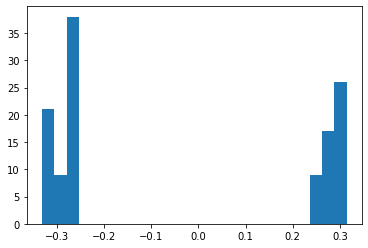

In [17]:
plt.hist( ds[:,6]*-1 , bins=25);

This variability in X could be a factor explaining the variability in response error Y.
The appropriate analysis to check this dependency is a “simple linear regression”. A regression tests for the contribution of the variability in an independent variable (here the inter-item distance X, which is independently set by the experimenter) to generating the variability in dependent variable (here the behavioral error Y).

To run the regression, you will learn a very intuitive way to structure matrices unig the pandas (pd) library: Dataframes.

pd.Dataframes and np.arrays are basically the same. However, pd.Datafarmes are more modern and they work better to run more sofistcated analysis. 

In [18]:
import pandas as pd
df = pd.DataFrame(data)
df.columns=['response', 'target', 'near', 'far', 'subj', 'error', 'dist_closest', 'cw_ccw']
df.head(30)

,response,target,near,far,subj,error,dist_closest,cw_ccw
0,2.717854,3.041933,2.727768,-1.600649,0.0,0.324079,-0.314166,1.0
1,2.520928,3.041933,2.727768,-1.600649,0.0,0.521005,-0.314166,1.0
2,2.683595,3.041933,2.727768,-1.600649,0.0,0.358338,-0.314166,1.0
3,2.712245,3.041933,2.727768,-1.600649,0.0,0.329688,-0.314166,1.0
4,2.565060,3.041933,2.727768,-1.600649,0.0,0.476873,-0.314166,1.0
5,2.571635,3.041933,2.727768,-1.600649,0.0,0.470298,-0.314166,1.0
6,2.637082,3.041933,2.727768,-1.600649,0.0,0.404851,-0.314166,1.0
7,0.566227,0.549933,0.253226,-2.923274,0.0,-0.016294,-0.296708,1.0
8,0.527693,0.549933,0.253226,-2.923274,0.0,0.022240,-0.296708,1.0
9,0.589037,0.549933,0.253226,-2.923274,0.0,-0.039103,-0.296708,1.0


First, we will ignore that data points come from different subjects. Run the analysis for all the data together and obtain the coefficients of the linear regression that fits the data.  We can run this analysis with the function *ols* in statsmodel.formula.api. Google it to see how it is used. A typical formula is 'Y ~X', where Y and X must be the titles of the columns of the dataframe that you pass to *ols*.

By using the dataframe you just have to define the function of the regression that you want to use. Which one is it?

In [19]:
df.dist_closest=df.dist_closest*-1

In [20]:
from statsmodels.formula.api import ols

mod = ols(formula= 'error ~ dist_closest', data=df)
res = mod.fit()

# The coefficients
print('Coefficients: \n', res.params)


Coefficients: 
 Intercept       0.027865
dist_closest    0.069416
dtype: float64


Can we say that the regression is significant? (i.e. is the slope of the regression line significantly different from zero?) Use the regression coefficients to plot the regression line on top of the actual data points (X,Y). Is the result in agreement with the analysis?

                            OLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     15.44
Date:                Mon, 18 May 2020   Prob (F-statistic):           9.19e-05
Time:                        12:10:43   Log-Likelihood:                 415.37
No. Observations:                 857   AIC:                            -826.7
Df Residuals:                     855   BIC:                            -817.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0279      0.005      5.388   

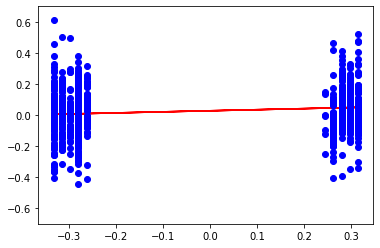

In [21]:
print(res.summary())
print("p-value for the slope: p=" + str(res.pvalues[1]))

x_data = data[:,6]
y_data =  res.params.Intercept  +  res.params.dist_closest *x_data
#we plot the regression line
plt.plot(x_data, y_data, 'r') 
# ...and the experimental data
plt.plot( df.dist_closest, df.error , 'bo')
plt.ylim(-0.7, 0.7)
plt.show()

We can now worry about the assumptions of the test, regression is a parametric test and assumes a normal distribution of residual errors. Check the distribution of residuals with *probplot* and with *normaltest*. Google them to learn about these functions. 


NormaltestResult(statistic=46.58913131211773, pvalue=7.643612768572302e-11)


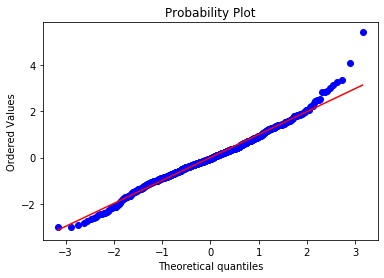

In [22]:
from scipy.stats import probplot
from scipy.stats import normaltest

probplot(res.resid_pearson, plot=plt);
print(normaltest(res.resid_pearson))

The test and the graph show that the distribution of residuals is non-Gaussian. This violates the assumptions of the linear regression method. Could it be about outliers?

We will thus control the outliers to make sure that they are not driving the result. We thus repeat the analysis without outliers. To identify outliers we will use the *zscore* function. Google about it to learn its meaning. A typical threshold for outliers is 3 standard deviations from the mean, in either direction:

Number of Upper outliers : 6
Number of Lower outliers : 851
                            OLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     18.59
Date:                Mon, 18 May 2020   Prob (F-statistic):           1.81e-05
Time:                        12:10:44   Log-Likelihood:                 458.91
No. Observations:                 850   AIC:                            -913.8
Df Residuals:                     848   BIC:                            -904.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

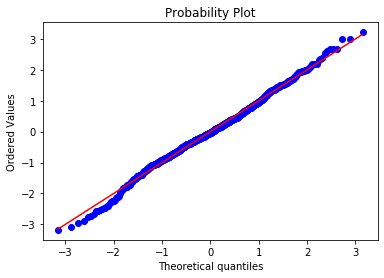

In [23]:
from scipy.stats import zscore # we import the zscore function

# get the number of upper outliers 
upp_out = sum(zscore(df.error ) > 3 )
print('Number of Upper outliers : ' +str(upp_out))

# get the number of lower outliers
low_out = sum(zscore(df.error) < 3 )
print('Number of Lower outliers : ' +str(low_out))

# now get the dataset excluding outliers
rem_out = abs(zscore(df.error)) < 3 # boolean for the non-outlier data rows
data_out = data[rem_out] # data without outliers

# we now build a Pandas Dataframe with this dataset
df_out = pd.DataFrame(data_out)
df_out.columns=['response', 'target', 'near', 'far', 'subj', 'error', 'dist_closest', 'cw_ccw']

# and we run the regression analysis
mod_out = ols(formula= 'error ~ dist_closest' , data=df_out)
res_out = mod_out.fit()

# we show the results
print( res_out.summary() )
print('')
print("p-value for the slope: p=" + str(res_out.pvalues[1]))
print('')

#and we test if the new data conforms to the Gaussian hypothesis
probplot( res_out.resid_pearson , plot=plt);
print(normaltest( res_out.resid_pearson ))

After removing 7 outliers in our data, we now find that the residuals of our model are distributed following a Gaussian distribution approximately, as the blue dots fall on the red line on the one hand, and the normality test on our residuals yields a non-significant p-value.

The three examples in the figure below illustrate 3 different situations with outliers. In case 1, the outlier is totally determining the regression so that if we drop it, the effect is gone (we cannot reject the horizontal line as best fit). In this case the outlier HAS to be dropped and you are not allowed to report any effect. This are the bad outliers. In case 2, the outlier has an effect on your data (the slope of the regression changes with and without the outlier, and the quality of the fit, too), but it does not change qualitatively your conclusions (still positive regression slope). You are allowed to remove the outlier but you should report the two values of the slope, when you have it and when you don't. The best case is case 3, where independently of whether you include the outlier or not, the result of your analysis is the same. In this case you can drop the outlier safely. In any case, you have to report that there was an outlier and that you dropped it for such and such reasons.

![](I:\\31869\\imgs\\outliers.png)

### Linear regression with categorical variables

Now we realize that in the regression analysis we included data points that were not truly independent, as they were collected in 9 different subjects. We thus want to include that part of the design in the regression analysis, as it could increase the statistical power. When we do that, we will need to use a “general linear model”, a linear model that includes factors of mixed nature, some being categorical and some continuous (as in regression). This is the most common situation and a general analysis tool that encompasses all the previous techniques in this assignment. To include subject identity in the design of a general linear model, we need to define the regressors as categorical, because otherwise it would be regressing orderly along our subject numbers. This is really simple by using the formula. Writting C('factor') instead of 'factor' makes it categorical. Implement that in the regression. 

Can you find the p-value for the regressor of interest? Why are the other regressors not “of interest”? Why do we include them, then? 



                            OLS Regression Results                            
Dep. Variable:                  error   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.773
Date:                Mon, 18 May 2020   Prob (F-statistic):           0.000113
Time:                        12:10:44   Log-Likelihood:                 466.54
No. Observations:                 850   AIC:                            -913.1
Df Residuals:                     840   BIC:                            -865.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0019      0.016      0.

0.10984145116061456

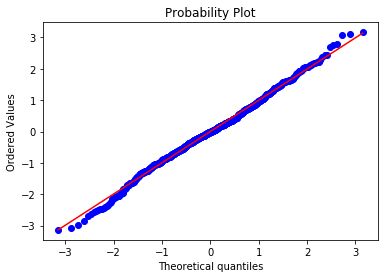

In [24]:
mod_sub = ols(formula= 'error ~ dist_closest + C(subj)' , data=df_out)
res_sub = mod_sub.fit()

print( res_sub.summary() )
print("p-value for the slope: p=" + str(res_sub.pvalues[1]))

probplot(res_sub.resid_pearson, plot=plt);
normaltest(res_sub.resid_pearson)[1]


In this assignment we have dealt with adding regressors that are not of interest *per se* in our analysis, but that we include in order to improve the model fit for our factor of interest. This is the classic condition for the “subject” part of the design (which, in addition could be treated as a random factor, try and read about that when you get to use these methods in your own data). In the assignment next week we will work with designs that have several factors of interest, and we will analyze the concept of interaction.